## 다차원 텐서 (다차원 배열)

In [36]:
import numpy as np
from scipy.special import softmax

### 다차원 배열의 계산 복습

In [19]:
A = np.array([[1, 2, 3], [4, 5, 6]]) 
B = np.array([[7, 8, 9], [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec   # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다차원 배열의 계산으로 순전파 구현

In [20]:
# 입력 데이터
X = np.random.randn(4, 5)   # 4개의 샘플, 5차원 feature

# 가중치
W = np.random.randn(5, 3)   # 5개의 입력 (feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1, 3)

# 선형 계산 (w*z + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(0, z)

print(result)

[[0.         0.         0.        ]
 [1.34157594 0.         1.13870198]
 [1.9133718  0.13883139 0.73263804]
 [0.         3.60283724 5.23681312]]


In [49]:
X = np.random.randn(6, 10)

# 은닉층 : 10개의 입력 -> 8개의 뉴런
w1 = np.random.randn(10, 8) 
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
w2 = np.random.randn(8, 4) 
b2 = np.random.randn(1, 4)

# 은닉층 계싼 (선형 계산  + tanh 활성화 함수)
z1 = np.dot(X, w1) + b1
result = np.tanh(z1)

# 충력층 계산 (성형 계산 + sofrmax 활성화 함수)
z2 = np.dot(result, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
result2 = exp_z/ np.sum(exp_z, axis=1, keepdims=True)

print(result2)


[[0.93597846 0.04547775 0.00707247 0.01147131]
 [0.64129006 0.00705504 0.13550957 0.21614533]
 [0.81720306 0.02383025 0.02529186 0.13367483]
 [0.26897401 0.55399759 0.04582181 0.13120659]
 [0.06853681 0.08820305 0.23423036 0.60902978]
 [0.41804631 0.00628969 0.26924515 0.30641885]]


##### 이미지 데이터 예시

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6939426668621262..3.148707426668378].


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

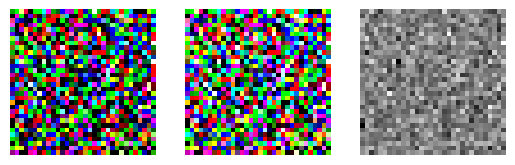

In [314]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5
channels = 3
height = 32
width = 32

images = np.random.randn(batch_size, channels, height, width)

bright_images = np.clip(images + 0.2, 0, 1)

gray_images = np.mean(images, axis=1)

# PyTorch 프로임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널)순서로 기대
# 따라서 transpose()를 이용해 축의 순서를 재배열
images_for_display = images[0].transpose(1, 2, 0)
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3 ,1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3 ,2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3 ,3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')
